## **CNN with MNIST Data**

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [2]:
print(tf.__version__)

2.8.0


In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [4]:
# tf.config.list_physical_devices('GPU')

In [5]:
# Release GPU memory to prevent memory-leaks.

# from numba import cuda
# device = cuda.get_current_device()
# device.reset()

In [6]:
#!nvidia-smi

In [7]:
from tensorflow.keras.datasets.mnist import load_data    # To load the MNIST digit dataset

(X_train, y_train) , (X_test, y_test) = load_data()      # Loading data

In [8]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [9]:
# Her biri 28*28 ebatlarında toplam 70000 image yüklendi (9'a kadar el yazısı ile yazılmış rakamlar)

In [10]:
# Checking the shape of one image
X_train[9].shape

(28, 28)

In [11]:
X_train[9]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0, 189, 190,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0, 143, 247, 153,   0,   0,
          0,   0],
       [  

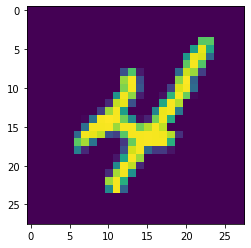

In [13]:
plt.imshow(X_train[9])
# plt.matshow(X_train[9])

In [14]:
y_train  # ÖNEMLİ : y değerleri scalar değer

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
np.array(np.unique(y_train, return_counts=True)).T

array([[   0, 5923],
       [   1, 6742],
       [   2, 5958],
       [   3, 6131],
       [   4, 5842],
       [   5, 5421],
       [   6, 5918],
       [   7, 6265],
       [   8, 5851],
       [   9, 5949]], dtype=int64)

In [16]:
len(y_train)

60000

In [17]:
y_train[9]

4

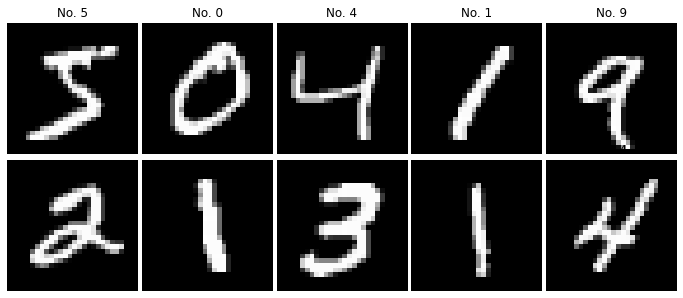

In [18]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c   # incelemek için datasetinden rastgele image seçiyoruz 
        ax[r,c].axis("off") 
        ax[r,c].imshow(X_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

## Data Preprocessing

In [19]:
X_train[9].min()

0

In [20]:
X_train[9].max()

255

In [21]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255  # normalization (scale) işlemi uyguladık
X_test /= 255   # bütün değerler 0-255 arası olduğundan minmax scale uygulamış olduk

In [22]:
X_train[9].min()

0.0

In [23]:
X_train[9].max()

1.0

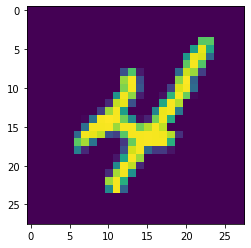

In [24]:
plt.imshow(X_train[9])
# normalize (scale) ettikten sonra da aynı resmi alabiliyoruz, yani sayı değerlerinin değişmesine rağmen matplotlib 
# normalization işlemi yapıldığını anlayabiliyor

In [25]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# resmi üç boyutlu olarak ifade ettik, modele bu şekilde input etmemiz gerekiyor
# y değerleri scalar değer olduğundan şu an için onda bir değişiklik yapmadık

In [26]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [27]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [28]:
from tensorflow.keras.utils import to_categorical

In [29]:
# y değerleri scalar büyüklük olduğundan kategorik değerlere çevireceğiz
# datada rakamların tamamı mevcut (10 tane)

In [30]:
Y_train = to_categorical(y_train, 10) # 10'u belirtmemiz şart değil ama good practise
Y_test = to_categorical(y_test, 10)  
Y_test.shape

# class sayısını yazmak şart değil ama yazmazsak default olarak "max(y)+1" sayısınca belirlenecek;
# farklı bir datada class'lar için verile sayılar 0'dan başlayıp sıra ile gitmezse ya da arada atlanan sayı olursa 
# bu durumda default değerini kullanmak hatalı sonuç vereceğinden ve
# notebook'u inceleyen farklı kişilerce anlaşılmasını kolaylaştırmak için class sayısını belirtmekte fayda var

(10000, 10)

In [31]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [33]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))
            # input_shape  ===> modeli fit etmeden summary almamızı sağlıyor

            # default strides:(1,1) and default padding:'valid' ("valid" means no padding)
            # input_shape burada belirlenirse summary ile eğitim başlamadan da özet bilgileri alabiliriz

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

**A sample example showing the conversion of 3D data to 2D**
![3Dto2D](https://dphi-courses.s3.ap-south-1.amazonaws.com/Deep+Learning+Bootcamp/3D+to++2D.png)

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [37]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])
# vision'da yüksek batch_size memory'yi yoruyor

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1530 - accuracy: 0.9546 - val_loss: 0.0573 - val_accuracy: 0.9809
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0517 - accuracy: 0.9842 - val_loss: 0.0494 - val_accuracy: 0.9835
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0341 - accuracy: 0.9895 - val_loss: 0.0369 - val_accuracy: 0.9875
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0224 - accuracy: 0.9929 - val_loss: 0.0402 - val_accuracy: 0.9871
Epoch 5/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0152 - accuracy: 0.9955 - val_loss: 0.0429 - val_accuracy: 0.9857


In [38]:
model.metrics_names

['loss', 'accuracy']

In [39]:
model.history.history

{'loss': [0.15303844213485718,
  0.051673829555511475,
  0.03414684161543846,
  0.022378724068403244,
  0.01523447223007679],
 'accuracy': [0.9545999765396118,
  0.98416668176651,
  0.9894833564758301,
  0.9928666949272156,
  0.9955000281333923],
 'val_loss': [0.057330138981342316,
  0.04940499737858772,
  0.03689200431108475,
  0.0402052067220211,
  0.042894694954156876],
 'val_accuracy': [0.98089998960495,
  0.9835000038146973,
  0.987500011920929,
  0.9871000051498413,
  0.9857000112533569]}

In [40]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.153038,0.954600,0.057330,0.9809
1,0.051674,0.984167,0.049405,0.9835
2,0.034147,0.989483,0.036892,0.9875
3,0.022379,0.992867,0.040205,0.9871
4,0.015234,0.995500,0.042895,0.9857


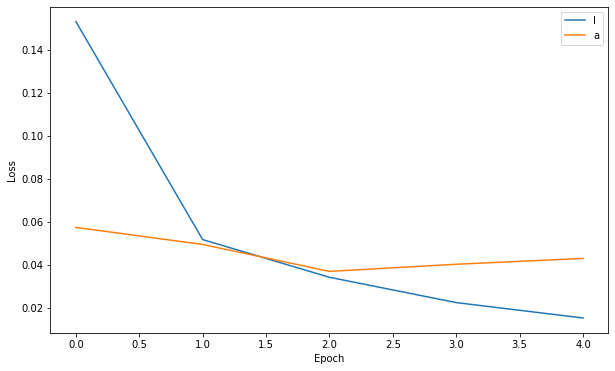

In [41]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend('labels')

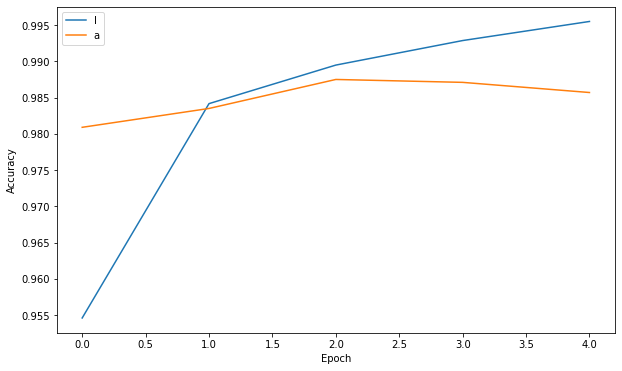

In [42]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend('labels');

In [43]:
print(model.evaluate(X_test,Y_test,verbose=1))

313/313 [==============================] - 1s 5ms/step - loss: 0.0429 - accuracy: 0.9857
[0.042894694954156876, 0.9857000112533569]


In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
preds = model.predict(X_test)
preds

array([[7.95348121e-10, 1.07540366e-10, 1.99465418e-07, ...,
        9.99994993e-01, 2.90157232e-08, 5.59223068e-09],
       [1.33465100e-10, 4.28334488e-06, 9.99995708e-01, ...,
        2.69061828e-10, 2.23268803e-09, 1.38254241e-12],
       [2.81135817e-06, 9.99762833e-01, 2.47075536e-06, ...,
        1.12178779e-04, 9.88231986e-05, 4.23022009e-08],
       ...,
       [6.52965205e-16, 7.51334541e-13, 3.21969231e-13, ...,
        1.53417918e-08, 3.95856059e-09, 1.03043343e-08],
       [1.00804055e-12, 1.82335446e-14, 3.01549182e-16, ...,
        9.71866129e-11, 3.97564418e-06, 3.82570386e-13],
       [4.32056474e-12, 1.81023096e-11, 5.26017355e-11, ...,
        4.46454227e-14, 4.81064910e-10, 1.15669410e-13]], dtype=float32)

In [46]:
preds[0]

array([7.95348121e-10, 1.07540366e-10, 1.99465418e-07, 4.75071374e-06,
       2.84841289e-10, 3.30107941e-10, 2.36888525e-12, 9.99994993e-01,
       2.90157232e-08, 5.59223068e-09], dtype=float32)

In [47]:
predictions= np.argmax(preds, axis=1)

In [48]:
len(predictions)

10000

In [49]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [50]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [51]:
print(confusion_matrix(y_test, predictions))

[[ 965    0    2    0    0    3    5    1    4    0]
 [   0 1125    2    1    0    0    2    2    3    0]
 [   0    1 1013    8    1    0    1    6    2    0]
 [   0    0    1  998    0    5    0    4    2    0]
 [   0    0    0    0  972    0    2    1    1    6]
 [   0    0    0   10    0  880    2    0    0    0]
 [   2    2    0    2    1    2  946    0    3    0]
 [   0    0    5    0    0    0    0 1021    1    1]
 [   0    0    3    3    2    2    1    5  956    2]
 [   1    0    0    6    9    4    0    6    2  981]]


In [52]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.042894694954156876
Test accuracy: 0.9857000112533569


In [53]:
# yeni bir tahmin yaptıracağız

In [54]:
my_number = X_test[5]

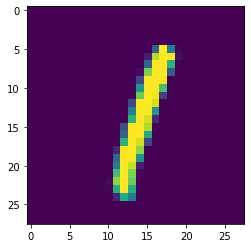

In [55]:
plt.imshow(my_number.reshape(28,28));

In [56]:
model.predict(my_number.reshape(1,28,28,1))  # tahmin almak için tek satırlı hale dönüştürdük

# # train setlerimizi modele hazırlarken X_train(60000, 28, 28, 1) yani 4 boyutlu olarak eğittik; bu nedenle reshape ile
# aynı boyuta getirmemiz gerekir; buradaki 1, tek resim için anlamında

array([[4.2744557e-07, 9.9925333e-01, 1.6470696e-07, 3.8629583e-08,
        5.7336420e-06, 2.3023865e-09, 2.2880723e-08, 7.2257791e-04,
        1.7525343e-05, 1.9406019e-07]], dtype=float32)

In [57]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)

array([1], dtype=int64)

In [58]:
model.save("cnn-1.h5")